# Random Forest Algorithm in Machine Learning


Random Forest is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression which makes it as ensemble learning technique. This helps in improving accuracy and reducing errors.

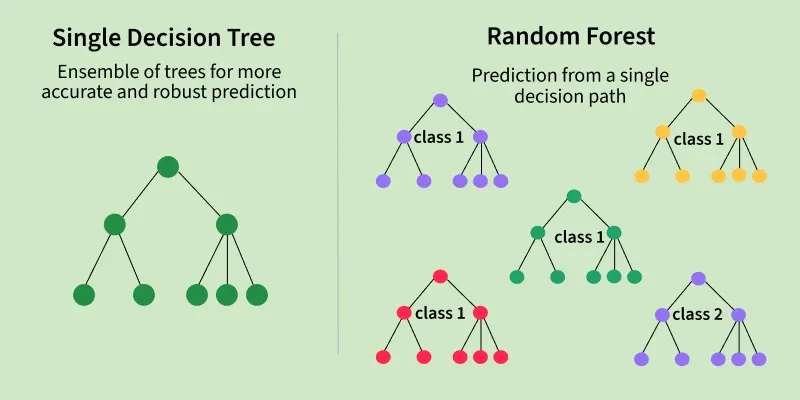

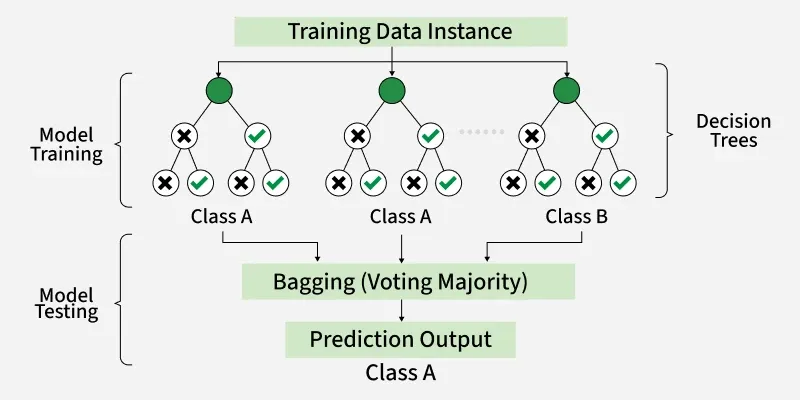

## Working of Random Forest Algorithm

* **Create Many Decision Trees:** The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.

* **Pick Random Features:** When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.
* **Each Tree Makes a Prediction:** Every tree gives its own answer or prediction based on what it learned from its part of the data.
* **Combine the Predictions:** For classification we choose a category as the final answer is the one that most trees agree on i.e majority voting and for regression we predict a number as the final answer is the average of all the trees predictions.
* **Why It Works Well:** Using random data and features for each tree helps avoid overfitting and makes the overall prediction more accurate and trustworthy.

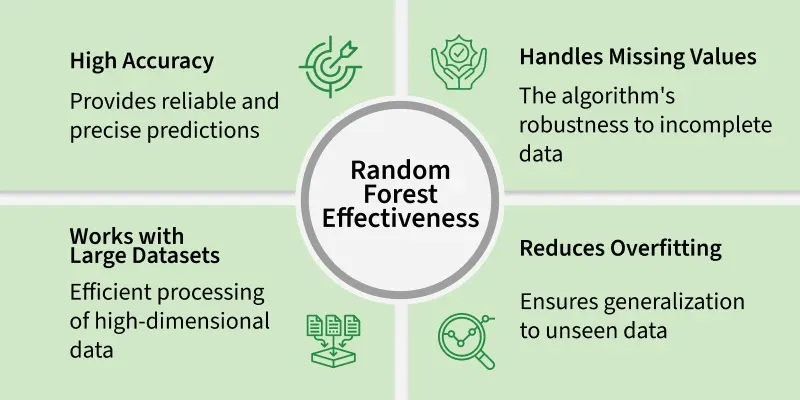

#### Key Features of Random Forest

* **Ensemble Learning:** Combines multiple decision trees to improve accuracy.
* **Randomness:** Uses random samples and features to create diverse trees.
* **Robustness:** Reduces overfitting and handles noisy data well.
* **Versatility:** Works for both classification and regression tasks.  

#### Assumptions of Random Forest

* **Independence of Trees:** Assumes that the individual decision trees are independent of each other.
* **Sufficient Data:** Requires a sufficiently large dataset to create diverse trees.
* **Feature Relevance:** Assumes that the features used for splitting are relevant to the target variable.  


## Implementing Random Forest for Classification Tasks

* Import libraries like pandas and scikit learn.
Load the Titanic dataset.
* Remove rows with missing target values ('Survived').
* Select features like class, sex, age, etc and convert 'Sex' to numbers.
* Fill missing age values with the median.
* Split the data into training and testing sets, then train a Random Forest model.
* Predict on test data, check accuracy and print a sample prediction result.

In [1]:

dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv"


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

titanic_data = pd.read_csv(dataset)

titanic_data = titanic_data.dropna(subset=['Survived'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'] = X['Age'].fillna(X['Age'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 3.0, 'Sex': 1.0, 'Age': 28.0, 'SibSp': 1.0, 'Parch': 1.0, 'Fare': 15.2458}
Predicted Survival: Did Not Survive


# Implementing Random Forest for Regression Tasks

We will do house price prediction here.

* Load the California housing dataset and create a DataFrame with features and target.
* Separate the features and the target variable.
* Split the data into training and testing sets (80% train, 20% test).
* Initialize and train a Random Forest Regressor using the training data.
* Predict house values on test data and evaluate using MSE and R² score.
* Print a sample prediction and compare it with the actual value.


In [2]:

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Predicted Value: 0.51
Actual Value: 0.48
Mean Squared Error: 0.26
R-squared Score: 0.81


## Advantages of Random Forest
* **High Accuracy:** Combines multiple trees to improve prediction accuracy.
* **Robustness:** Reduces overfitting and handles noisy data well.
* **Versatility:** Works for both classification and regression tasks.
* **Feature Importance:** Identifies important features in the data.

## Limitations of Random Forest
* **Complexity:** More complex and harder to interpret than single decision trees.
* **Computationally Intensive:** Requires more computational resources and time to train. 